# Introduction to neural network classification with TensorFlow

 A classification is where you try to cassify something as one thing or another

 * Binary classificaion
 * Multiclass classification
 * Multilabel classification

# Creating data to view and fit

In [53]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


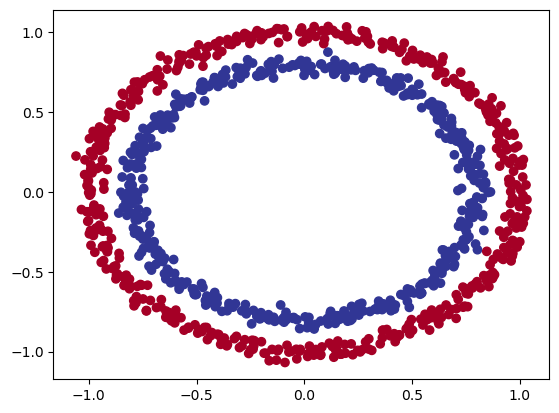

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
  X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFloe are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [10]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [11]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [28]:
import tensorflow as tf
import datetime
import numpy as np

In [35]:
# # Set the random seed
# tf.random.set_seed(42)

# # Initialize W&B
# wandb.init(project="Classification_fundamentals", name="Dense:1:Sigmoid.SGD.E:5")

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["accuracy"])  # Use a list for metrics

# # Set up TensorBoard callback
# model_info = "Sigmoid.SGD.E:5"
# log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# # 3. Fit the model with both callbacks
# model.fit(X, y, epochs=5, callbacks=[tensorboard_callback, WandbCallback()])

In [34]:
# import os
# import datetime

# # Set the random seed
# tf.random.set_seed(42)

# # Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
# ])

# # Compile the model
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["accuracy"])  # Use a list for metrics

# # Specify absolute path for TensorBoard logs
# absolute_path = os.path.abspath(
#     "C:\\Users\\Kajetan\\tensorflow_fundamentals-main\\logs\\fit"
# )

# # Set up TensorBoard callback
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# # Fit the model with both callbacks
# model.fit(X, y, epochs=5, callbacks=[tensorboard_callback])


Epoch 1/5


32/32 [==============================] - 2s 5ms/step - loss: 0.8571 - accuracy: 0.5020
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8487 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.5030
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.8332 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.5020


In [14]:
# Start a new TensorBoard instance
%tensorboard --logdir logs/fit

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1, show_shapes=True)

NameError: name 'model_1' is not defined

In [57]:
tf.random.set_seed(42)

wandb.init(project="Classification_fundamentals", name="Dense:100:10:1.Relu.Sigmoid.E:250")

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model_into = "Dense:100:10:1.Relu.Sigmoid.E:250"
log_dir = "logs/fit" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=0,  # No profiling
    write_images=True,  # Weight images
    embeddings_freq=1,
    embeddings_metadata='Dense:100:10:1.Relu.Sigmoid.E:250.tsv',
    update_freq='epoch'  # update after each epoch
)

model.fit(X, y, epochs=250, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▅▅▅▅▅▅▅▅▅▅▅▅▅▆▅▅▆▅▅▆▆▅▄▆▅▆▄▅▆▆█▄▄▃▇▅▄▁▃▃
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.477
epoch,249
loss,0.69322


Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4780
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4650
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4690
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4880
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4490
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 162/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 163/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 164/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4730
Epoch 165/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4730
Epoch 166/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4820
Epoch 167/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 168/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4920
Epoch 169/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4850
Epoch 170/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4940
Epoc

In [58]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 16:55:35 ago. (Use '!kill 15002' to kill it.)

In [56]:
# SInce we're working on a binary classfication problem and our odewl is getting aroud 50% acccuracy... 
# it is preforming as
# So let's step things up a notch and add an extra layer

In [62]:
# Set the random seed
tf.random.set_seed(42)

# Initialize W&B
wandb.init(project="Classification_fundamentals", name="Dense:1,1.Relu,Sigmoid.E:100")

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# Set up TensorBoard callback
model_info = "Dense:1,1.Relu,Sigmoid.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=1,
    write_images=True,
    embeddings_freq=1,
    embeddings_metadata="Dense:1,1.Relu,Sigmoid.E:100.tsv",
    update_freq="epoch"
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▇▄▄▃▃▄▅▅▆▇▂▅▇▅▂▁▆▅▂▄▃█▆▆▇█▃▆▆▆▆▆▆▆▆▆▆▄▂▇
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▄▅▂▃▅▅▄▂▂▁▄▃▃█▄▃▄▁▂▃▃▃▃▆▄▄▅▄▃▂▄▃▄▁▄▆▅▆▅▅
accuracy,0.511
epoch,99
loss,0.69323


2023-12-17 11:29:35.756734: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-12-17 11:29:35.756762: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-12-17 11:29:35.758449: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-12-17 11:29:35.758547: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2017] CUPTI activity buffer flushed
2023-12-17 11:29:35.842404: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-12-17 11:29:35.842431: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


2023-12-17 11:29:36.151776: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-12-17 11:29:36.152036: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2017] CUPTI activity buffer flushed
2023-12-17 11:29:36.156880: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-17 11:29:36.158032: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [63]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 857us/step - loss: 0.6924 - accuracy: 0.5030


[0.6924315690994263, 0.503000020980835]

In [64]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 17:05:16 ago. (Use '!kill 15002' to kill it.)

In [65]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

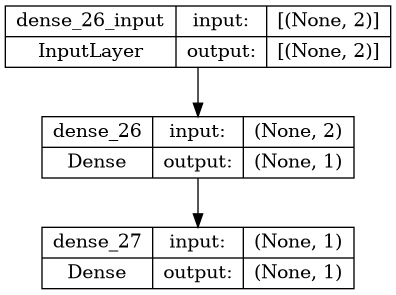

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_3, show_shapes=True)

## Improving our  model

1. Create a model - we might to dd moe layers or increase the number of hidden units within a layer
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fir our model for more epochs (leave it training for longer)

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
wandb.init(project="Classification_fundamentals", name="Dense:100relu,10relu,1sigmoid.Adam.E:100")
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set up TensorBoard callback with default values
model_info = "Dense:100relu,10relu,1sigmoid.Adam.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y:%:m%:d-%H%:M%:S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

model_3.save("/home/kajetan/tensorflow_fundamentals/02_best_models_keras/model_3.keras")
history_df = pd.DataFrame(history.history)
history_df.to_csv("/home/kajetan/tensorflow_fundamentals/02_best_models_history/model_3_history.csv", index=False)

accuracy,▁▁▁▅▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,███▇▇▆▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,1.0
epoch,99
loss,0.00415


In [56]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6852), started 0:39:51 ago. (Use '!kill 6852' to kill it.)

In [82]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000


[0.0036392402835190296, 1.0]

In [83]:
metric_names = model_2.metrics_names

prefixed_metric_names_2 = [f"Model_2_{metric}" for metric in metric_names]
prefixed_metric_names_3 = [f"Model_3_{metric}" for metric in metric_names]

df = pd.DataFrame({
    "Metric": metric_names + metric_names,
    "Value": model_2.evaluate(X, y) + model_3.evaluate(X, y),
    "Model":  prefixed_metric_names_2 + prefixed_metric_names_3
})

df

32/32 [==============================] - 0s 946us/step - loss: 0.0036 - accuracy: 1.0000


,Metric,Value,Model
0,loss,0.692432,Model_2_loss
1,accuracy,0.503000,Model_2_accuracy
2,loss,0.003639,Model_3_loss
3,accuracy,1.000000,Model_3_accuracy


In [84]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
wandb.init(project="Classification_fundamentals", name="Dense:100relu,10relu,1sigmoid.Adam.E:30")
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set up TensorBoard callback with default values
model_info = "Dense:100relu,10relu,1sigmoid.Adam.E:30"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_4.fit(X, y, epochs=30, verbose=0, callbacks=[tensorboard_callback, WandbCallback()])

accuracy,▁▁▁▄▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,███▇▇▆▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,1.0
epoch,99
loss,0.00409


In [85]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 17:50:14 ago. (Use '!kill 15002' to kill it.)

To visualize our model's predictions, let's create a function `plot_decision_boundary()`

* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions accros the meshgrid
* Plot the predicitoons as well as a line between zones

In [43]:
import numpy as np

In [14]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 799us/step
doing binary classifcation...


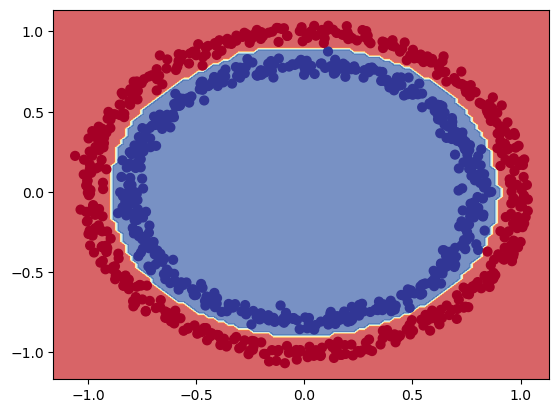

In [118]:
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [88]:
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
    x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [148]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

Oh wait... we compiled our model for a binary classification proble.

But... we're working on a regression problem, let's change the model to suit our data

In [33]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_info = "Regression.Dense:100,10,1.Adam:E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train, 
            epochs=100,
           callbacks=[tensorboard_callback])

NameError: name 'X_reg_train' is not defined

In [150]:
model_3.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 1ms/step - loss: 37.8223 - mae: 37.8223


[37.82229232788086, 37.82229232788086]

In [151]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 18:57:43 ago. (Use '!kill 15002' to kill it.)

In [230]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

model_info = "Regression.Dense:20,10,1.Adam:E:20"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train, 
            epochs=20,
           callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 450.4804 - mae: 450.4804
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 328.1139 - mae: 328.1139
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 208.8671 - mae: 208.8671
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 83.7413 - mae: 83.7413
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 69.7581 - mae: 69.7581
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 96.0965 - mae: 96.0965
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 67.6270 - mae: 67.6270
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 44.5895 - mae: 44.5895
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 48.6459 - mae: 48.6459
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 42.2163 - mae: 42.2163
Epoch 11/20
5/5 [==============================] - 0s 3ms/step 

In [153]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 18:57:44 ago. (Use '!kill 15002' to kill it.)

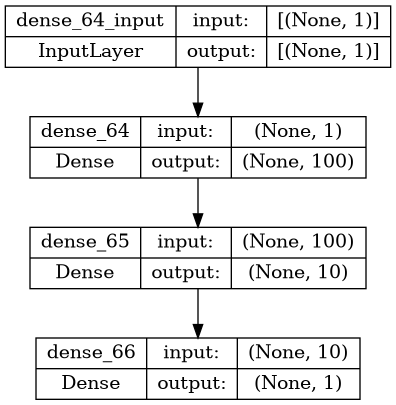

In [154]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True, to_file='model_4.png')


2/2 [==============================] - 0s 3ms/step


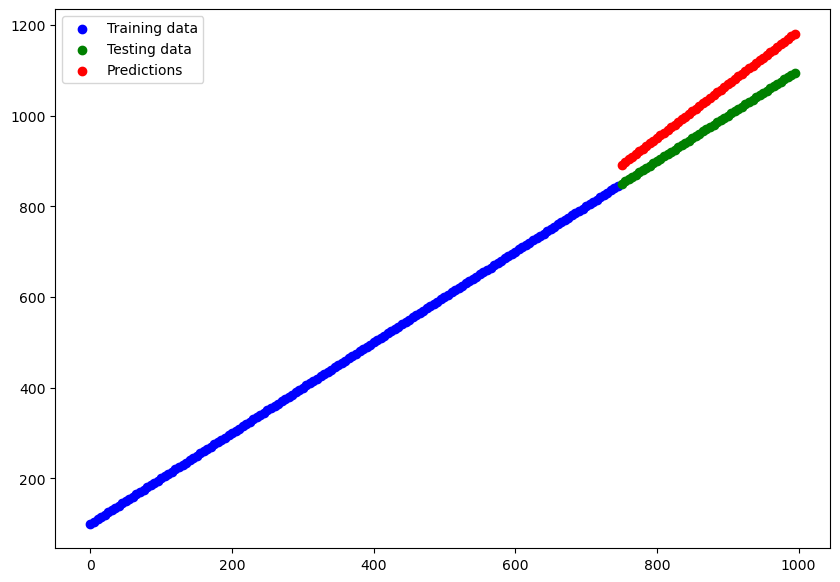

In [157]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();
     

# The missing piece: Non-linearity

In [173]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

model_info = "Regression.Dense:1.Adam.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

model_5.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2980 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2344 - accuracy: 0.4640
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1343 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1026 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0865 - accuracy: 0.4650
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0823 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0795 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0775 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0756 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0738 - accuracy: 0.4660
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.8605 - accuracy: 0.4920
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8574 - accuracy: 0.4920
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8542 - accuracy: 0.4920
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.4920
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8481 - accuracy: 0.4920
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8453 - accuracy: 0.4920
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8426 - accuracy: 0.4920
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8399 - accuracy: 0.4920
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8372 - accuracy: 0.4920
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8346 - accuracy: 0.4920
Epoch 93/100


In [174]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15002), started 21:13:58 ago. (Use '!kill 15002' to kill it.)

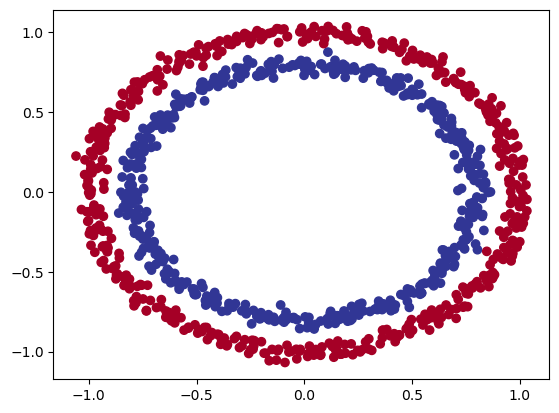

In [175]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 930us/step
doing binary classifcation...


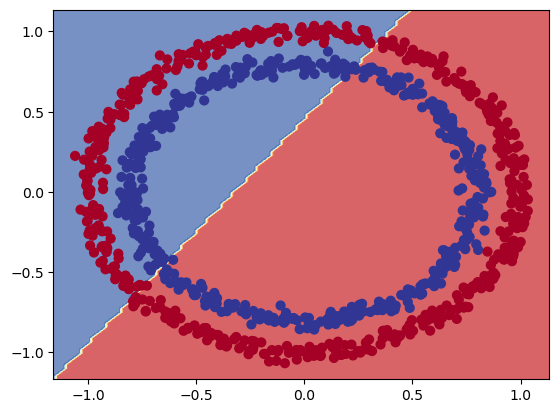

In [176]:
# Check the decision boundary 
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

Let's try build our first neural network with non -lineral activation function.

In [198]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:1.Adam,lr=0.001.E:100"
log_dir = "logs/dir" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_6.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5271 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4826 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4634 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4565 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4513 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4459 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4415 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4375 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4338 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4301 - accuracy: 0.4730
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.9312 - accuracy: 0.4930
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9201 - accuracy: 0.4930
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9103 - accuracy: 0.4950
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9017 - accuracy: 0.4940
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8941 - accuracy: 0.4940
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8869 - accuracy: 0.4950
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8807 - accuracy: 0.4950
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8746 - accuracy: 0.4960
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8691 - accuracy: 0.4960
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8639 - accuracy: 0.4960
Epoch 93/100


In [199]:
%tensorboard --logdir logs/fit

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


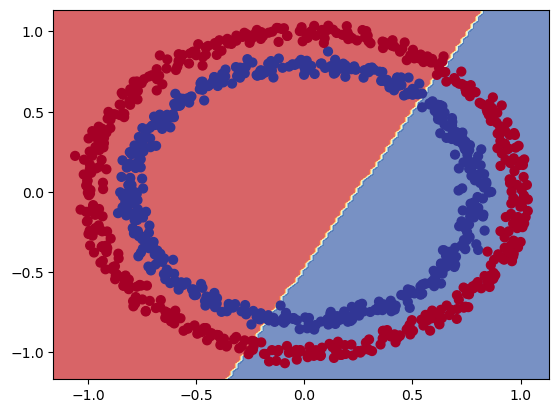

In [200]:
# Check the decision boundary 
plot_decision_boundary(model=model_6,
                      X=X,
                      y=y)

In [203]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:5,5.Adam,lr=0.001.E:100"
log_dir = "logs/fit" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_6.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0039 - accuracy: 0.2180
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7804 - accuracy: 0.2200
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6246 - accuracy: 0.2130
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4988 - accuracy: 0.1950
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3975 - accuracy: 0.1570
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2789 - accuracy: 0.1450
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1081 - accuracy: 0.1420
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9257 - accuracy: 0.1350
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7739 - accuracy: 0.1330
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4915 - accuracy: 0.1370
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.7744 - accuracy: 0.4080
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.4080
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7713 - accuracy: 0.4060
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7698 - accuracy: 0.4000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7683 - accuracy: 0.3940
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7669 - accuracy: 0.3880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.3860
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7641 - accuracy: 0.3800
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7627 - accuracy: 0.3790
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7613 - accuracy: 0.3760
Epoch 93/100


In [205]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 75198), started 0:02:09 ago. (Use '!kill 75198' to kill it.)

In [210]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics="accuracy")

model_info = "Classification:Dense:5,5,1.Adam,lr=0.001.E:100"
log_dir = "logs/fit/" + model_info + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# 3. Fit the model
model_7.fit(X, y, epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


In [214]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 75198), started 0:07:12 ago. (Use '!kill 75198' to kill it.)

In [215]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [213]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 897us/step - loss: 0.7503 - accuracy: 0.3440


[0.7503441572189331, 0.3440000116825104]

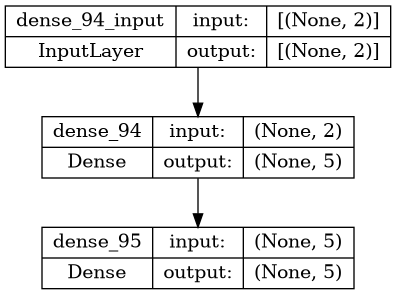

In [216]:
from tensorflow.keras.utils import plot_model
plot_model(model_6, show_shapes=True)

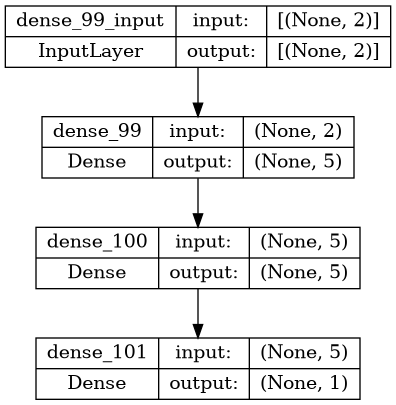

In [217]:
plot_model(model_7, show_shapes=True)

313/313 [==============================] - 0s 671us/step
doing multiclass classification...


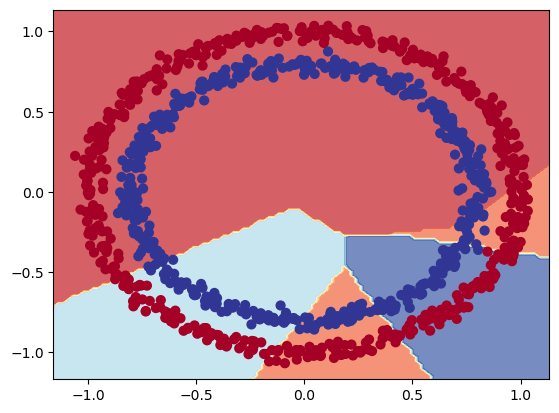

In [218]:
# How do our model predicitons look?
plot_decision_boundary(model_6, X, y)

313/313 [==============================] - 0s 687us/step
doing binary classifcation...


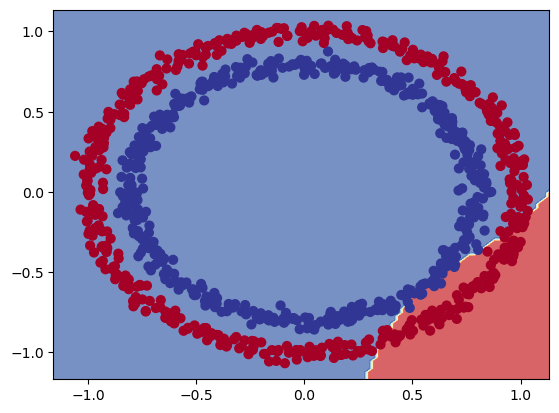

In [219]:
plot_decision_boundary(model_7, X, y)

313/313 [==============================] - 0s 790us/step
doing binary classifcation...


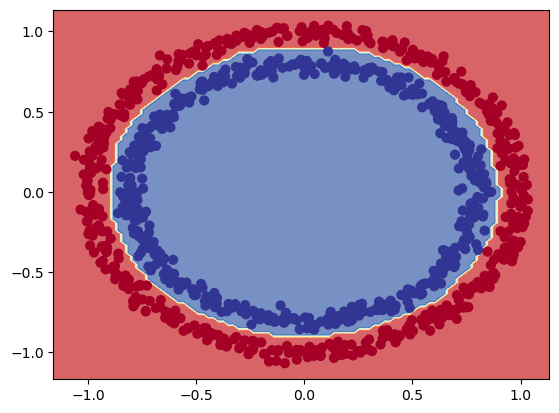

In [222]:
plot_decision_boundary(model_3, X, y)

In [224]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000


[0.0048370338045060635, 1.0]

In [225]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7503 - accuracy: 0.3440


[0.7503441572189331, 0.3440000116825104]

In [227]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [14]:
# Creaet a toy a tensor (similar to the data we pass into our moels)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

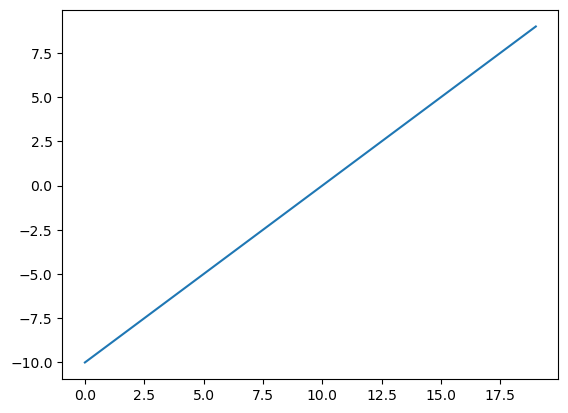

In [15]:
# Visualize our toy tensor
plt.plot(A);

In [16]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmodi funciton of our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

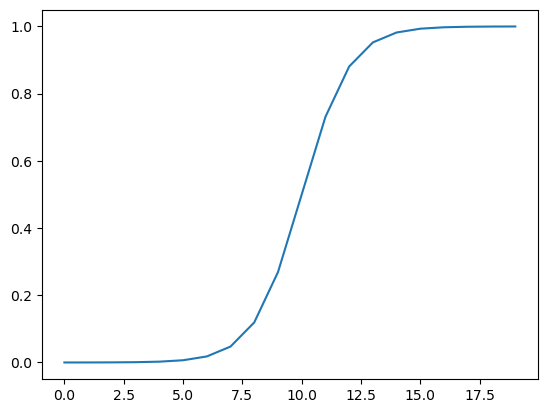

In [17]:
plt.plot(sigmoid(A))

In [18]:
def relu(x):
    return tf.maximum(x, 0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

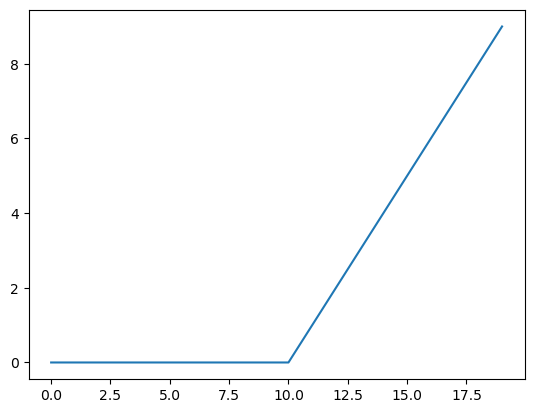

In [19]:
plt.plot(relu(A))

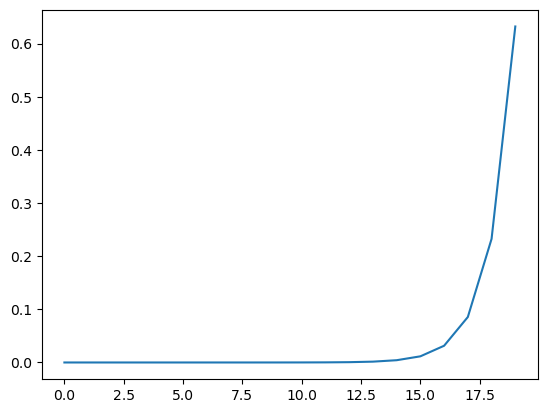

In [20]:
plt.plot(tf.nn.softmax(A))

In [21]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

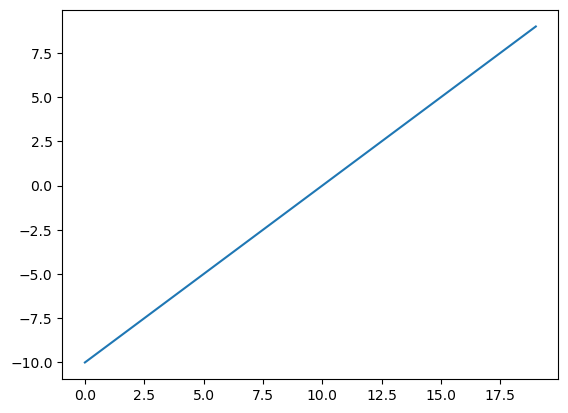

In [22]:
# Does the linear activation fucntion change anything?
plt.plot(tf.keras.activations.linear(A))

In [23]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving ou classification

In [24]:
# Check how many examples we have
len(X)

1000

In [25]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [21]:
import os
import datetime

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Add activation="sigmoid"
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])  # Use a list for metrics

# Specify absolute path for TensorBoard logs
absolute_path = os.path.abspath(
    "/home/kajetan/tensorflow_fundamentals/logs/fit"
)

# Set up TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# 3. Fit the model
history = model_8.fit(X, y, epochs=25, callbacks=[tensorboard_callback])
model_8.save("/home/kajetan/tensorflow_fundamentals/best_models_keras/model_8.keras")

Epoch 1/25
32/32 [==============================] - 1s 1ms/step - loss: 0.6965 - accuracy: 0.4970
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4860
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5160
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5150
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5390
Epoch 6/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5730
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.6100
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6090
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6800
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7710
Epoch 11/25
32/32 [

In [22]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6852), started 0:04:01 ago. (Use '!kill 6852' to kill it.)

In [26]:
# 4 Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1340 - accuracy: 0.9850


[0.13396739959716797, 0.9850000143051147]

313/313 [==============================] - 0s 654us/step
doing binary classifcation...
313/313 [==============================] - 0s 666us/step
doing binary classifcation...


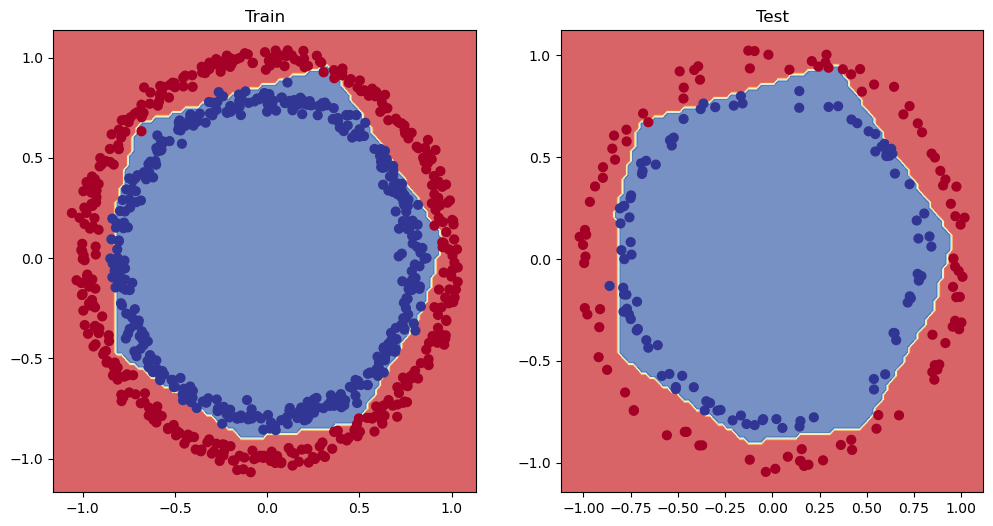

In [29]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [30]:
model_8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Convert the hitory object into a dataframe 
pd.DataFrame(history.history)

,loss,accuracy
0,0.696545,0.497
1,0.693146,0.486
2,0.688833,0.516
3,0.686631,0.515
4,0.684382,0.539
5,0.673513,0.573
6,0.662817,0.610
7,0.641401,0.609
8,0.610149,0.680
9,0.554311,0.771


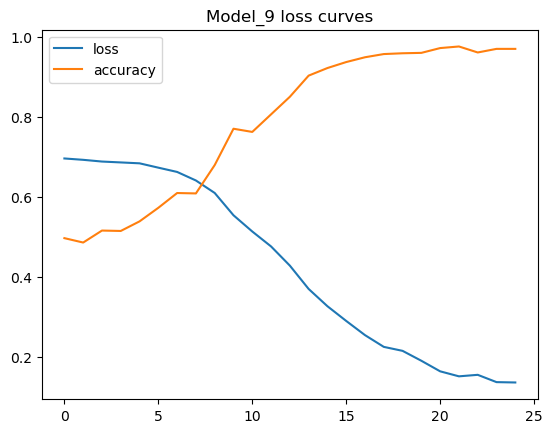

In [32]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves");

## Finding the best learning rate

TO find the ideal learnig rate (the learning rate whete the loss decreases the most during trianing) we're going to use the following steps:
* A leearning raet **callback** - you can tthink of a callback as an extra piec of functionality, you can add to you **while** its training.
* Another model (we could use the same one as above, but we're practing building 

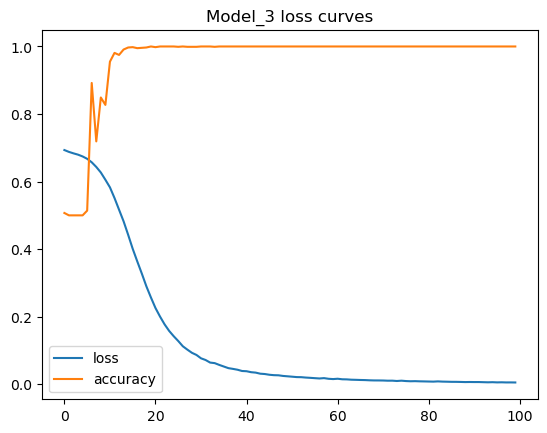

In [60]:
import pandas as pd

# Load the training history from a CSV file
loaded_model_3_history = pd.read_csv("/home/kajetan/tensorflow_fundamentals/02_best_models_history/model_3_history.csv")

# Plot the training history
loaded_model_3_history.plot()
plt.title("Model_3 loss curves")
plt.show()

In [61]:
from tensorflow.keras.models import load_model

loaded_model_3 = load_model("/home/kajetan/tensorflow_fundamentals/02_best_models_keras/model_3.keras")
loaded_model_3.evaluate(X, y)

32/32 [==============================] - 0s 964us/step - loss: 0.0047 - accuracy: 1.0000


[0.0046789757907390594, 1.0]

In [68]:
import os

tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

absolute_path = os.path.abspath(
    "/home/kajetan/tensorflow_fundamentals/logs/fit"
)

# Set up TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

# Fit the model 
history_10 = model_10.fit(X_train, 
                       y_train, 
                       epochs=100, 
                       callbacks=[lr_scheduler, tensorboard_callback])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7556 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7522 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7488 - accuracy: 0.4837 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7450 - accuracy: 0.4825 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7412 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7372 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.4800 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7290 - accuracy: 0.4775 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8575 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8163 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8800 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8275 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8637 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8587 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7125 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7575 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6

<Axes: xlabel='epochs'>

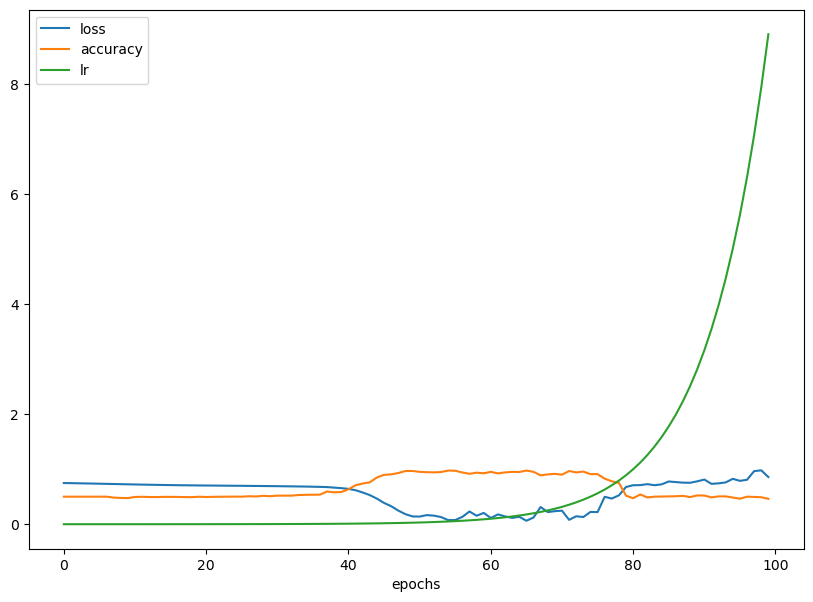

In [69]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

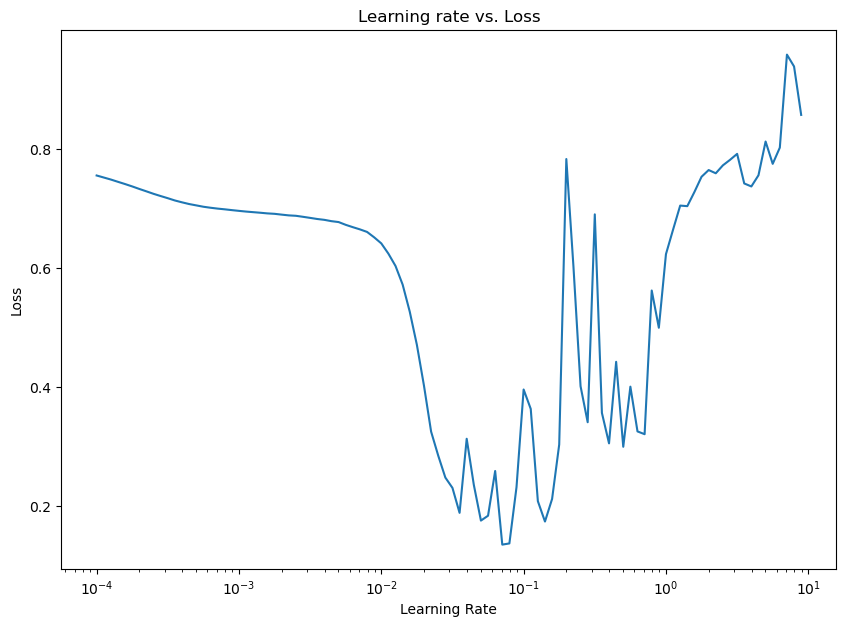

In [71]:
# Plot the learning rate versys the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [79]:
1e-1, 1e-2, 1e-3, 1e-4, 2e-2

(0.1, 0.01, 0.001, 0.0001, 0.02)

In [91]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(2e-2),
                metrics=["accuracy"])

absolute_path = os.path.abspath(
    "/home/kajetan/tensorflow_fundamentals/logs/fit"
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=absolute_path)

history_11 = model_11.fit(X_train, y_train, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4875
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5663
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.5700
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7100
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8687
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8138
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8450
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.9287
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9137
Epoch 11/20
25/25 [

<Axes: xlabel='epochs'>

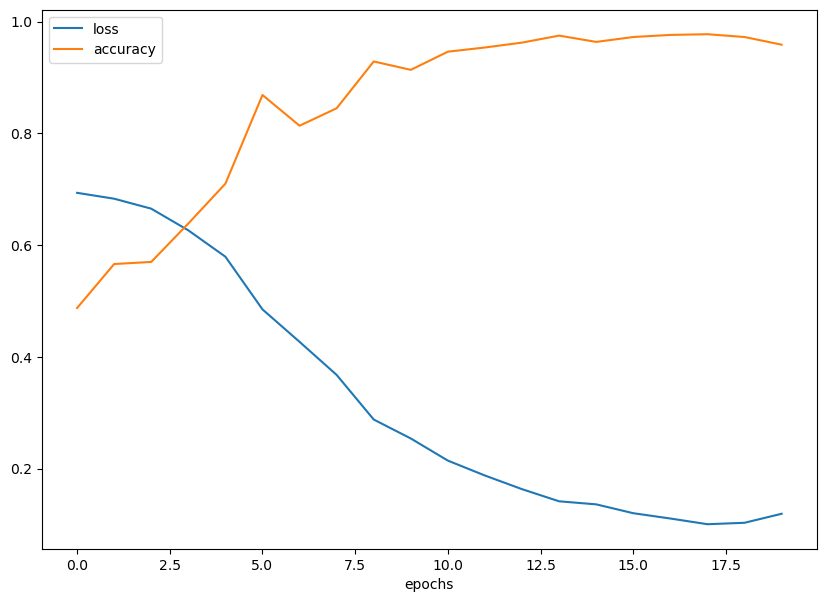

In [92]:
pd.DataFrame(history_11.history).plot(figsize=(10, 7), xlabel="epochs")

In [93]:
# Evaluate
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9500


[0.14479784667491913, 0.949999988079071]

In [94]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6852), started 2:20:25 ago. (Use '!kill 6852' to kill it.)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=train)
plt.subplot(1, 2, 2)
plt.title("Test")
plt_decision_boundary(mode)